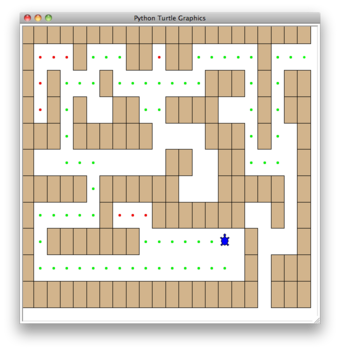

https://runestone.academy/runestone/books/published/pythonds/Recursion/ExploringaMaze.html
1. "+" for wall, space for open square, S to indicate starting position.
2. We load the maze from file with above indications. 
3. internal representation of maze is list of lists

In [1]:
import turtle
from turtle import Turtle
PART_OF_PATH = 'O'
TRIED = '.'
OBSTACLE = '+'
DEAD_END = '-'

class Maze:

    def __init__(self,mazefilename):
        rowsInMaze = 0
        columnsInMaze = 0
        self.mazeList = [] # list or lists. each list is a row which is sequence of chr +(wall) and space (opne), S- start
        
        with open(mazefilename,'r') as file:
            for row in file:
                rowlist = []
                col = 0
                for ch in row[:-1]:
                    if ch == 'S':
                        self.startRow = rowsInMaze
                        self.startCol = col
                    col += 1
                    rowlist.append(ch)
                self.mazeList.append(rowlist)
                rowsInMaze += 1
                columnsInMaze = len(rowlist)
        
        self.rowsInMaze = rowsInMaze
        self.columnsInMaze = columnsInMaze
        self.xTranslate = - columnsInMaze//2
        self.yTranslate = rowsInMaze//2
        self.t =Turtle(shape='turtle')
        self.wn = turtle.Screen()
        self.wn.setworldcoordinates( -(columnsInMaze-1)//2 - 0.5,-(rowsInMaze-1)//2 - 0.5,(columnsInMaze-1)//2 +
                                    0.5, (rowsInMaze-1)//2 + 0.5)
        
    def print(self):
        for row in self.mazeList:
            print(row)
        print('rows : {}, columns : {}, xTranslate : {}, yTranslate : {}, starRow : {} , startCol : {}'.
              format(self.rowsInMaze,self.columnsInMaze,self.xTranslate,self.yTranslate, self.startRow, self.startCol))
    
    def drawMaze(self):
        self.t.speed(10)
        self.wn.tracer(0)
        for y in range(self.rowsInMaze):
            for x in range(self.columnsInMaze):
                if self.mazeList[y][x] == OBSTACLE:
                    self._drawCenteredBox(x+self.xTranslate,-y+self.yTranslate,'orange')
        self.t.color('black')
        self.t.fillcolor('blue')
        self.wn.update()
        self.wn.tracer(1)
        self.wn.exitonclick()
        #turtle.done()
        
    
    def _drawCenteredBox(self,x,y,color):
        self.t.up()
        self.t.goto(x-.5,y-.5)
        self.t.color(color)
        self.t.fillcolor(color)
        self.t.setheading(90)
        self.t.down()
        self.t.begin_fill()
        for i in range(4):
            self.t.forward(1)
            self.t.right(90)
        self.t.end_fill()
        
    def isExit(self,row,col):
        return (row ==0 or
               row == self.rowsInMaze-1 or
               col == 0 or
               col == self.columnsInMaze-1)
    
    def __getitem__(self,idx):
        return self.mazeList[idx]
    
    def moveTurtle(self,x,y):
        self.t.up()
        self.t.setheading(self.t.towards(x+self.xTranslate,-y+self.yTranslate))
        self.t.goto(x+self.xTranslate,-y+self.yTranslate)
    
    def dropBreadCrumb(self,color):
        self.t.dot(color)
        
    def updatePosition(self,row,col,val=None):
        print(row,col)
        if val:
            self.mazeList[row][col] =val
        self.moveTurtle(col,row)
        
        if val == PART_OF_PATH:
            color = 'green'
        elif val == OBSTACLE:
            color = 'red'
        elif val ==  TRIED:
            color = 'black'
        elif val == DEAD_END:
            color = 'red'
        else:
            color = None
        if color:
            self.dropBreadCrumb(color)


def searchFrom(maze,startRow,startColumn):
    # we are going to use recursion
    # 1. base case
    maze.updatePosition(startRow,startColumn)
    
    if maze[startRow][startColumn] == OBSTACLE:
        return False
    if maze[startRow][startColumn] == TRIED or maze[startRow][startColumn] == DEAD_END:
        return False
    
    if maze.isExit(startRow,startColumn):
        maze.updatePosition(startRow,startColumn,PART_OF_PATH)
        return True
    maze.updatePosition(startRow,startColumn,TRIED)
    
    found = searchFrom(maze, startRow-1,startColumn) or \
    searchFrom(maze, startRow+1,startColumn) or \
    searchFrom(maze, startRow,startColumn-1) or \
    searchFrom(maze, startRow,startColumn+1)
    
    if found:
        maze.updatePosition(startRow,startColumn,PART_OF_PATH)
    else:
        maze.updatePosition(startRow,startColumn,DEAD_END)

maze = Maze('mazefile.txt')
maze.print()
maze.drawMaze()
maze.updatePosition(maze.startRow,maze.startCol)
searchFrom(maze,maze.startRow,maze.startCol)

['+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+']
['+', ' ', ' ', ' ', '+', ' ', ' ', ' ', '+', '+', ' ', '+', '+', ' ', ' ', ' ', ' ', ' ', '+', ' ', ' ', ' ']
['+', ' ', '+', ' ', ' ', ' ', '+', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '+', '+', '+', ' ', '+', ' ', '+', '+']
['+', ' ', '+', ' ', '+', ' ', ' ', '+', '+', ' ', ' ', '+', '+', '+', '+', ' ', ' ', ' ', '+', ' ', '+', '+']
['+', '+', '+', ' ', '+', '+', '+', '+', '+', '+', ' ', ' ', ' ', ' ', '+', '+', '+', ' ', '+', ' ', ' ', '+']
['+', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '+', '+', ' ', ' ', '+', '+', ' ', ' ', ' ', ' ', '+']
['+', '+', '+', '+', '+', ' ', '+', '+', '+', '+', '+', '+', ' ', ' ', ' ', '+', '+', '+', '+', '+', ' ', '+']
['+', ' ', ' ', ' ', ' ', ' ', '+', ' ', ' ', ' ', '+', '+', '+', '+', '+', '+', '+', ' ', ' ', '+', ' ', '+']
['+', ' ', '+', '+', '+', '+', '+', '+', '+', ' ', ' ', ' ', ' ', ' ', ' ', 'S', ' ', '+', ' ', ' ', ' ', '+']
[

TclError: invalid command name ".!canvas"